<a href="https://colab.research.google.com/github/lphuong304/CS114.L21/blob/main/COLAB_ASSIGNMENTS/B%C3%80I_T%E1%BA%ACP_COLAB_S%E1%BB%90_01_12_04_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1><center><center><center>BÀI TẬP COLAB SỐ 01 - 12/04/2001</center></h1>**
###LỚP: CS114.L21
###NHÓM:
1. Nguyễn Ngọc Lan Phương - *19520227*
2. Hoàng Anh Tú - *19522450*
3. Nguyễn Quốc Huy - *19521623*



####Cre: Recognizing hand-written digits - [LINK](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

Ví dụ này sử dụng thư viện scikit-learn để nhận viện số viết tay (từ 0 - 9).

Đầu tiên ta import các thư viện cần thiết.

In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


Automatically created module for IPython interactive environment


###DỮ LIỆU CHỮ SỐ

Tập dữ liệu chữ số bao gồm hình ảnh của các chữ số có độ phân giải là 8x8 pixel. Thuộc tính hình ảnh của tập dữ liệu là một mảng có kích thước 8x8 thể hiện thang độ xám của mỗi hình. Chúng ta sẽ sử dụng các mảng này để hình dung 4 hình ảnh đầu tiên.  Thuộc tính target của tập dữ liệu lưu trữ chữ số mà mỗi hình ảnh đại diện và điều này được bao gồm trong tiêu đề của 4 ô bên dưới. 

**Lưu ý**: nếu ta làm việc với tệp hình ảnh (ví dụ: tệp ‘png '), sử dụng **matplotlib.pyplot.imread** để tải hình ảnh.

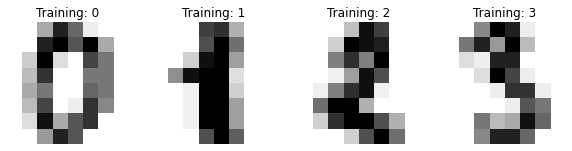

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

Truy xuất hình ảnh chữ số đầu tiên của bộ datasets:

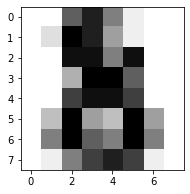

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

In [ ]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
digits.images[-1]

  Để xử lý hình ảnh có kích thước 8x8 như trên, ta phải chuyển nó về một vector đặc trưng có độ dài là 64.

###PHÂN LỚP
Để tiến hành phân loại trên bộ dữ liệu này, ta cần "làm phẳng" các hình ảnh, chuyển từng mảng 2 chiều các giá trị thang độ xám từ kích thước là (8, 8) sang kích thước (64,).  Sau đó, toàn bộ tập dữ liệu sẽ có dạng là (n_samples, n_features).

Trong đó:
* n_samples là số lượng hình ảnh
* n_features là tổng số pixel trong mỗi hình ảnh.


In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Sử dụng thư viện hỗ trợ giải thuật SVM (support vector metrics) trong scikit-learn là **SVC** để phân loại mẫu lớp với tham số $C = 0.001$

In [ ]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)
#clf.fit(data[:n_samples], digits.target[:n_samples])

Ta sẽ chia tập dữ liệu **digits** một cách ngẫu nhiên theo tỉ lệ 50% dùng để traning, 50% dùng để test và demo hai tập trên. Lưu ý kích thước trả về 

In [ ]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

print('X_train',X_train[0])
print('X_test', X_test[0])
print('y_train',y_train[0])
print('y_test', y_test[0])

X_train [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
X_test [ 0.  0.  1. 11. 14. 15.  3.  0.  0.  1. 13. 16. 12. 16.  8.  0.  0.  8.
 16.  4.  6. 16.  5.  0.  0.  5. 15. 11. 13. 14.  0.  0.  0.  0.  2. 12.
 16. 13.  0.  0.  0.  0.  0. 13. 16. 16.  6.  0.  0.  0.  0. 16. 16. 16.
  7.  0.  0.  0.  0. 11. 13. 12.  1.  0.]
y_train 0
y_test 8


Cho mẫu học từ tập dữ train và dự đoán trên tập dữ liệu test

In [ ]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Để dễ hình dung hơn ta hiển thị giá trị chữ số và dự đoán chúng trên tiêu đề đối với 4 chữ số đầu tiên của tập dữ liệu test

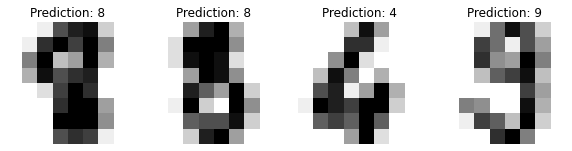

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Module **metrics.classification_report** đánh giá tập train qua các chỉ số phân loại chính (precison, recall, f1-score, support)

In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Để nhìn rõ hơn về các điểm dữ liệu trong hệ thống phân lớp chữ số này được phân loại đúng sai như thế nào, ta trực quan nó với Confusion Matrix.

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


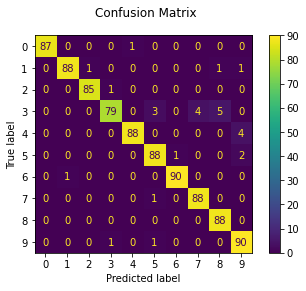

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### DỰ ĐOÁN CHỮ SỐ TỪ ẢNH TẠO TỪ PAINT



In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo_1.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo_1.jpg


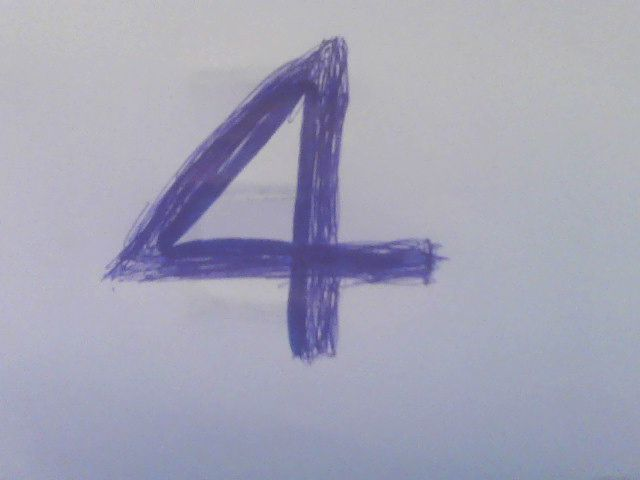

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<a name ="xulyhinhanh"></a>
#### ***Tiền xử lý hình ảnh***

1. Vì hình ảnh trong bộ dữ liệu digits datastes là hình trắng đen (nền đen, chữ trắng) nên bước đầu chúng em chuyển hình ảnh sang màu trắng đen.
2. Nhằm tránh mất mát dữ liệu trong quá trình resize hình về kích thước 8x8 pixels, chúng em crop hình dựa vào giá trị pixel của các màu (cụ thể là trắng và đen)
* Pixel màu nền lớn hơn hoặc bằng 95
* Pixel màu nét chữ bé hơn 95


Trước khi resize: 
[[66 66 65 ... 71 72 72]
 [68 66 67 ... 71 72 69]
 [65 64 66 ... 71 71 70]
 ...
 [79 79 80 ... 84 84 85]
 [81 81 81 ... 84 84 85]
 [82 81 81 ... 85 84 85]]


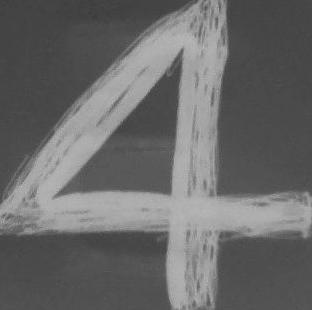

In [ ]:
#Edit input image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
inImg = cv2.imread("/content/photo_1.jpg", 0)
inImg = 255 - inImg[:, :]

maxUp = inImg.shape[0]//2
maxDown = inImg.shape[0]//2
maxLeft = inImg.shape[1]//2
maxRight = inImg.shape[1]//2

for i in range(inImg.shape[0]):
  for j in range(inImg.shape[1]):
    if inImg[i][j] > 160:
      if maxUp >= i: maxUp = i
      if maxDown <= i: maxDown = i
      if maxLeft >= j: maxLeft = j
      if maxRight <= j: maxRight = j

editedImg = inImg[maxUp:maxDown+1, maxLeft:maxRight+1] 
resizeImg = cv2.resize(editedImg,(8,8))

print('Trước khi resize: ',editedImg, sep='\n')
cv2_imshow(editedImg)

Xuất hình ảnh sau khi resize về kích thước (8,8) pixels

In [ ]:
cv2_imshow(resizeImg)
print('Sau khi resize: ',resizeImg, sep='\n')

Sau khi resize: 
[[ 68  67  67  72 147 150  70  69]
 [ 70  71  78 168 111 169  72  72]
 [ 72  73 171 164  78 133  75  74]
 [ 75 163 162  79  96 141  77  77]
 [ 86 175  89  89 172 136  81  79]
 [145 164 169 169 175 178 173 155]
 [ 72  74  80  74 162 151  79  77]
 [ 79  79  83  83 168 113  81  82]]


Đưa dữ liệu hình vào bộ dữ liệu ta được kết quả như sau

**Lưu ý**: Yêu cầu để đạt được kết quả tốt nhất, dữ liệu đầu vào phụ thuộc nhiều vào giá trị pixel giữa nền và nét chữ số. 

Text(0.5, 1.0, 'Prediction: [4]')

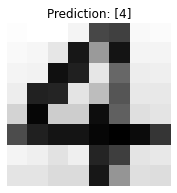

In [ ]:
data = resizeImg/16
predicted = clf.predict(data.reshape(1,64))
_, ax = plt.subplots(figsize=(4, 3))
ax.set_axis_off()
image = resizeImg
ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_title(f'Prediction: {predicted}')

### ***BÁO CÁO BÀI TẬP COLAB SỐ 01 - 12/04/2021***
*1*. Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?

Hình ảnh trong tập dữ liệu là hình đen trắng có kích thước (8,8) pixels nên bộ dữ liệu chỉ hoạt động tốt nhất trên những hình ảnh có cùng thuộc tính. Nên chúng em đã nghĩ ra cách tiền xử lý dữ liệu hình ảnh như ở phần [Tiền xử lý hình ảnh](#xulyhinhanh)

*2*. Ủa mà nhìn vào đâu để kết luận là tốt hay không?

Nhìn vào số lần kết quả predict không như mong muốn của nhóm (chiếm đa phần).

*3*. Nếu không tốt thì lý do tại sao?
* Kích thước của mỗi ảnh trong bộ dữ liệu trên quá nhỏ cho các trường hợp trong thực tế.
* Phụ thuộc vài bước tiền xử lý nhiều.

*4*. Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?


Có thể được nếu như sử dụng bộ dữ liệu khác tương thích hơn với các trường hợp trong thực tế.